In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
iris_df = pd.read_csv('iris.csv')
iris_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
#calculating total number of rows and columns
iris_df.shape

(150, 5)

# EDA

In [ ]:
#Checking any duplicated values in the dataset
iris_df.duplicated().sum()

np.int64(1)

In [ ]:
# Remove duplicates from the dataset
iris_df = iris_df.drop_duplicates()

In [ ]:
# Verify if the duplicates are removed
iris_df.duplicated().sum()

np.int64(0)

In [ ]:
# Check column names and data types
iris_df.dtypes

,0
sepal.length,float64
sepal.width,float64
petal.length,float64
petal.width,float64
variety,object


In [ ]:
#checking null values in the dataset
iris_df.isnull().sum()

,0
sepal.length,0
sepal.width,0
petal.length,0
petal.width,0
variety,0


In [ ]:
# Class distribution
iris_df['variety'].value_counts()

,count
variety,
Setosa,50
Versicolor,50
Virginica,49


In [ ]:
# Dataset Summary
iris_df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Visualization

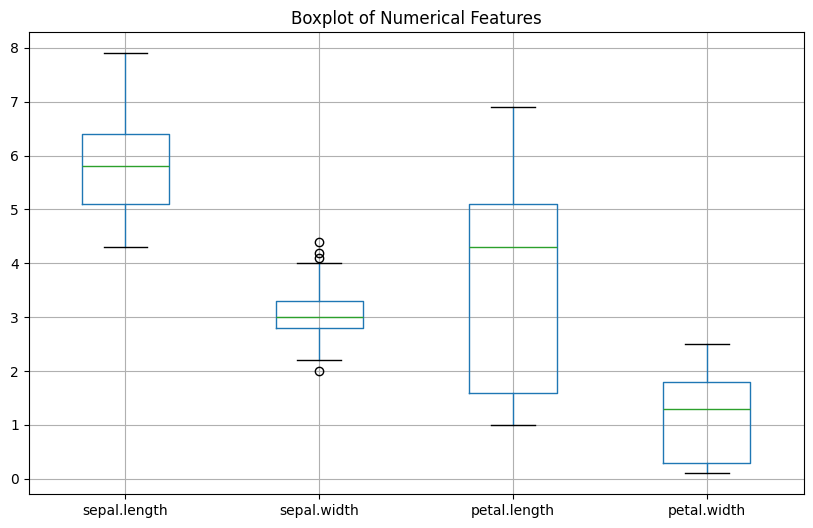

In [ ]:
# Boxplot of features
plt.figure(figsize=(10,6))
iris_df.drop('variety', axis=1).boxplot()
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=0)
plt.show()

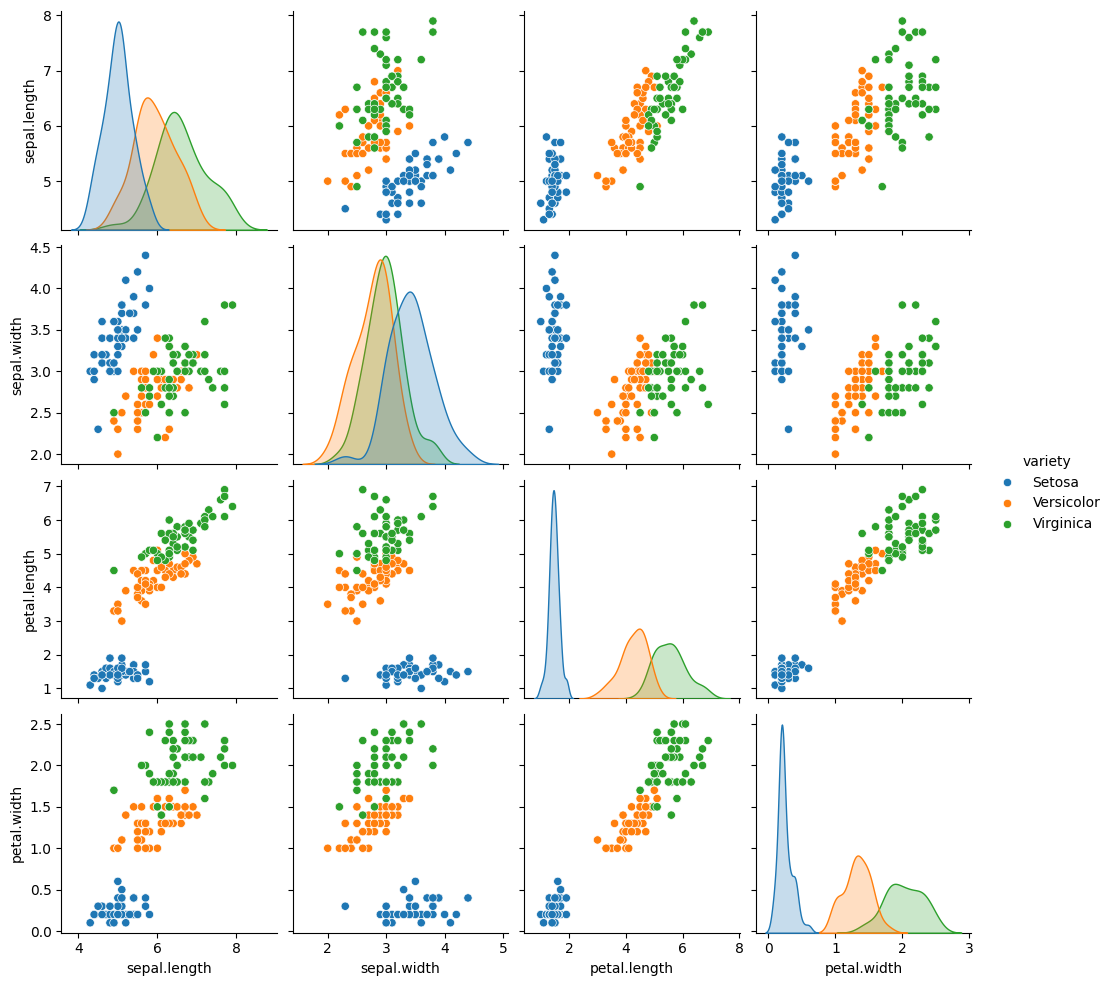

In [ ]:
# Pairplot
sns.pairplot(iris_df, hue='variety')
plt.show()

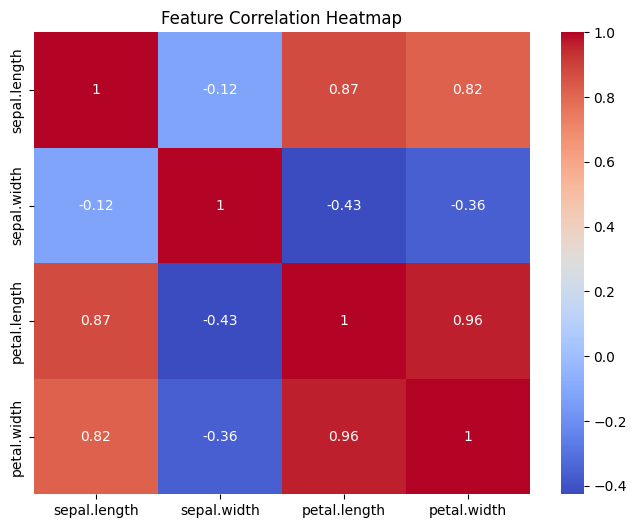

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(iris_df.drop('variety', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  149 non-null    float64
 1   sepal.width   149 non-null    float64
 2   petal.length  149 non-null    float64
 3   petal.width   149 non-null    float64
 4   variety       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [ ]:
# Features are all columns except the last one (0 to 3)
X = iris_df.iloc[:, 0:4]
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# Target Variable
y = iris_df.iloc[:, 4]
y.head()

,variety
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [ ]:
#checking the shape of x and y
print('The shape of feature variable x =',X.shape)
print('The shape of target variable y =',y.shape)

The shape of feature variable x = (149, 4)
The shape of target variable y = (149,)


In [ ]:
# Encode the target labels
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
#checking the shape of x_train, y_train, x_test, y_test
print('The shape of x_train =',X_train.shape)
print('The shape of y_train =',y_train.shape)
print('The shape of x_test =',X_test.shape)
print('The shape of y_test =',y_test.shape)

The shape of x_train = (104, 4)
The shape of y_train = (104,)
The shape of x_test = (45, 4)
The shape of y_test = (45,)


## Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_lr = model.predict(X_test)
y_pred_lr

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [ ]:
# Calculating the Testing Score
lr_testing_score = model.score(X_test, y_test) * 100
print("Testing Score of Logistic Regression = {:.2f} %".format(lr_testing_score))

Testing Score of Logistic Regression = 100.00 %


In [ ]:
# Calculating the Accuracy
from sklearn.metrics import accuracy_score
lr_accuracy = accuracy_score(y_test, y_pred_lr) * 100
print("The accuracy of Logistic Regression = {:.2f} %".format(lr_accuracy))

The accuracy of Logistic Regression = 100.00 %


In [ ]:
# Calculating Error (Optional for Classification)
from sklearn.metrics import mean_squared_error
lr_mse = mean_squared_error(y_test, y_pred_lr) * 100
print("Error in the Logistic Regression Model = {:.2f} %".format(lr_mse))

Error in the Logistic Regression Model = 0.00 %


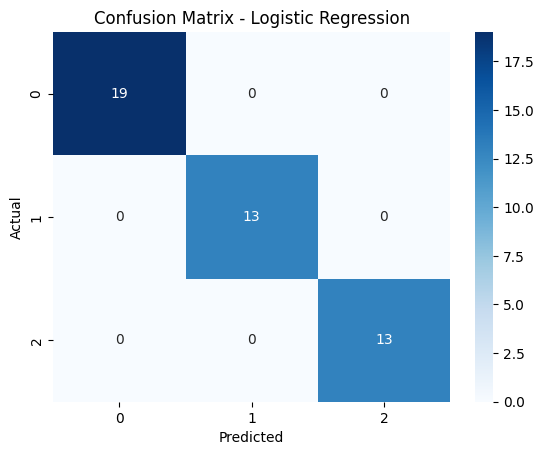

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

